In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.io import readsav
import pprint

pp = pprint.PrettyPrinter(indent=4).pprint

In [36]:
%ls ../../sambuca/tests/data

error_data.sav                           qbtest_input_spectra.lib
_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav  qbtest_output_spectra.hdr
forwardModelTestValues.mat               qbtest_output_spectra.lib
no_noise_error_data.sav                  test_error_noise.mat
qbtest_filter_350_900nm.hdr              test_error_no_noise.mat
qbtest_filter_350_900nm.lib              test_optimise_data.mat
qbtest_input_spectra.hdr                 test_resample.mat


In [37]:
data = readsav('../../sambuca/tests/data/_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav')

/usr/lib/python3.4/site-packages/scipy/io/idl.py:420: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


In [38]:
data.keys()

dict_keys(['iop_a', 'alpha_val', 'topline', 'rat', 'noiserrs', 'water_corrected_mixel', 'realrrs', 'q1', 'rrs', 'h', 'substrater', 'qwater', 'iop_bb', 'lsq', 'zz', 'spectra', 'botline1', 'subsdet_spectral', 'error', 'f_val', '_idlidetempvar_', 'r1', 'sambuca', 'z', 'r2', 'botline2'])

In [39]:
data.spectra[0].dtype.names

('WL',
 'SUBSTRATER',
 'INPUT_SPECTRA',
 'A',
 'BB',
 'R0',
 'R0DP',
 'KD',
 'KUC',
 'KUB')

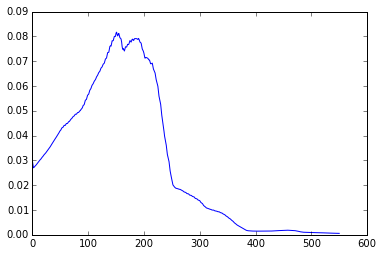

In [40]:
plt.plot(data.spectra[0].R0);

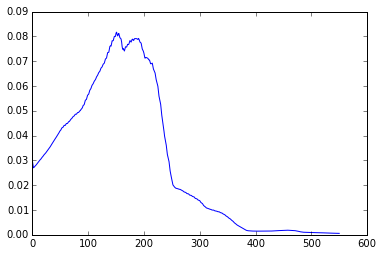

In [53]:
plt.plot(data.spectra[0].R0DP);

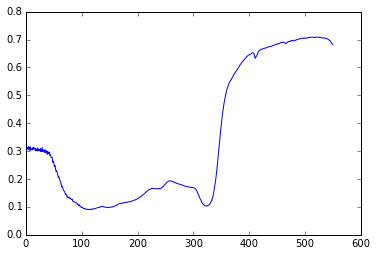

In [41]:
plt.plot(data.spectra[0].substrater);

In [42]:
data.sambuca.dtype.names

('DISTANCES',
 'OPTI_PARAMS',
 'INPUT_PARAMS',
 'IMAGESPECTRA',
 'INPUT_SPECTRA',
 'INPUTR',
 'INPUT_SIOP',
 'WGOSW')

In [43]:
data.sambuca.input_spectra[0].dtype.names

('WL',
 'AWATER',
 'BBWATER',
 'APHY_STAR',
 'ACDOM_STAR',
 'ATR_STAR',
 'BBPH_STAR',
 'BBTR_STAR',
 'CALCULATE_SIOPS',
 'SUBSTRATER')

In [44]:
data.sambuca.input_params[0].dtype.names

('THETA_AIR', 'LAMBDA0CDOM', 'LAMBDA0TR', 'LAMBDA0X')

# Parameters in ZZ

In [45]:
type(data.zz)

numpy.ndarray

In [46]:
len(data.zz)

15

#Substrate Extraction

In [47]:
data.sambuca.inputr[0].dtype.names

('N_SPECTRA', 'SUBS_Z', 'SPECTRA', 'NAMES', 'INDEX')

In [48]:
spectra = data.sambuca.inputr[0].spectra[0]
indicies = data.sambuca.inputr[0].index[0]
substrate1 = spectra[indicies[0]]

In [49]:
data.sambuca.inputr[0].spectra[0][:,0].shape

(551,)

In [50]:
len(data.sambuca.inputr[0].index)

1

#Error data

In [51]:
noise_data = readsav('../../sambuca/tests/data/error_data.sav')
noise_data.keys()

dict_keys(['rrs', 'error_af', 'error_a', 'noiserrs', 'error_f', 'lsq', 'realrrs'])

In [52]:
no_noise_data = readsav('../../sambuca/tests/data/no_noise_error_data.sav')
no_noise_data.keys()

dict_keys(['rrs', 'error_af', 'error_a', 'noiserrs', 'error_f', 'lsq', 'realrrs'])